In [1]:
import prep
import glob
import numpy as np
import newdb
import matplotlib.pyplot as plt
import math
import scipy.interpolate as inter

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# test_file = file_names[1855]
# test_file = file_names[1603]
# test_file = file_names[200]

In [5]:
cfa_names = glob.glob("../../../cfa_test_data/*.flm")
bsnip_names = glob.glob("../../../bsnip_test_data/*.flm")
csp_names = glob.glob("../../../csp_test_data/*.dat")
swift_names = glob.glob("../../../swift_uvspec/*.flm")
other_names = glob.glob("../../../other_test_data/*.dat")
foley_names = glob.glob("../../../ryan_hst/*.flm")
NED_red_dict = newdb.build_NED_redshift_dict('../data/info_files/NED_redshift_info.txt')
sndict, date_dict = newdb.read_cfa_info('../data/spectra/cfa/cfasnIa_param.dat',
                                      '../data/spectra/cfa/cfasnIa_mjdspec.dat')
bsnip_vals = newdb.read_bsnip_data('obj_info_table.txt')
short_bsnip_dict = newdb.create_short_bsnip_dict(bsnip_vals)
rsd = newdb.build_redshift_dict(short_bsnip_dict, sndict)

../../../cfa_test_data\sn2001fh-20011107.20-fast.flm
2001fh cfa 0.01299


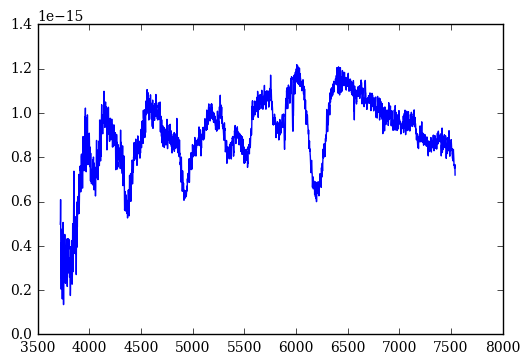

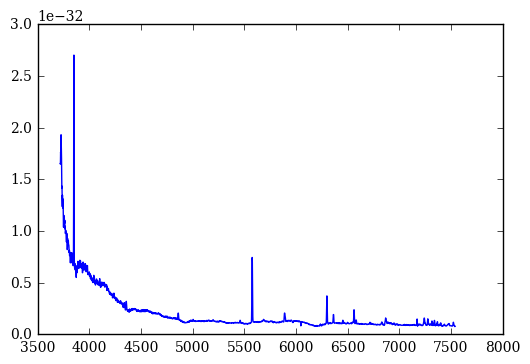

0.00341566218399 26.5103374606


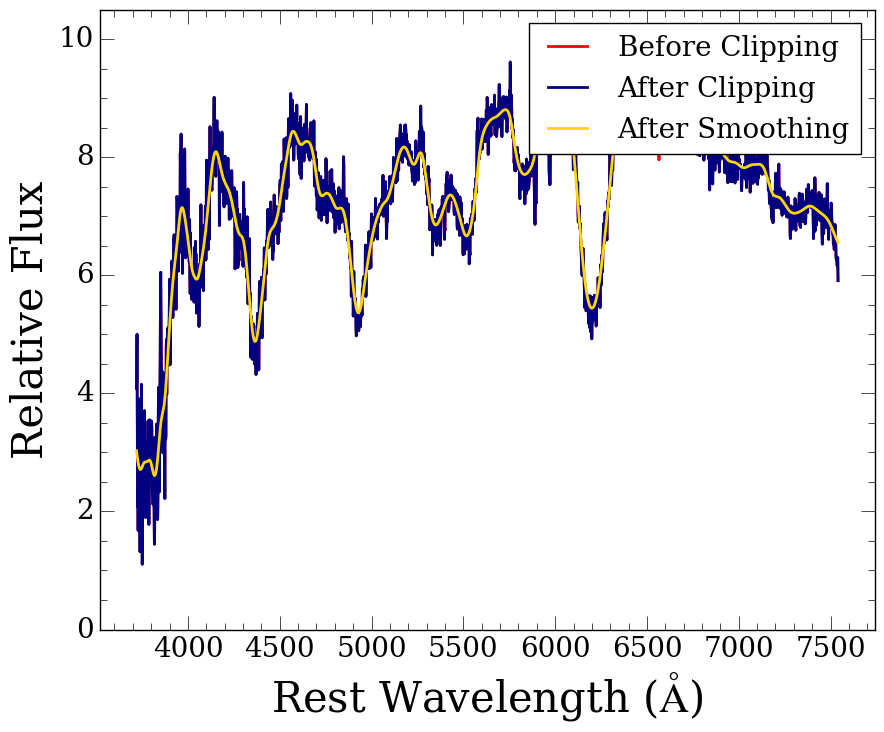

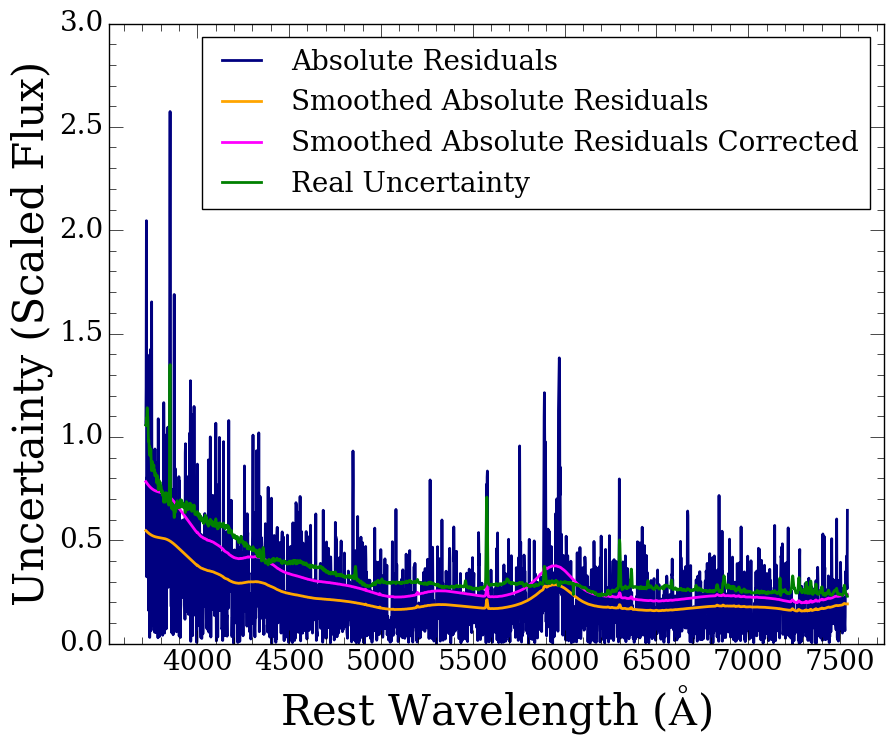

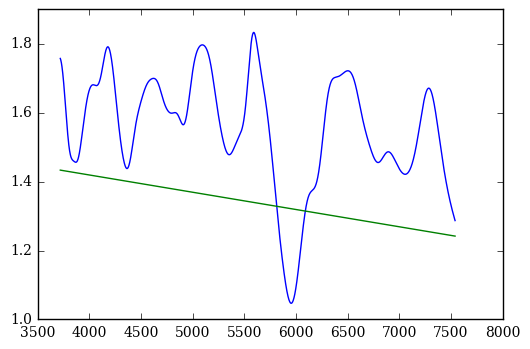

29.4482299526
Milky Way correction...


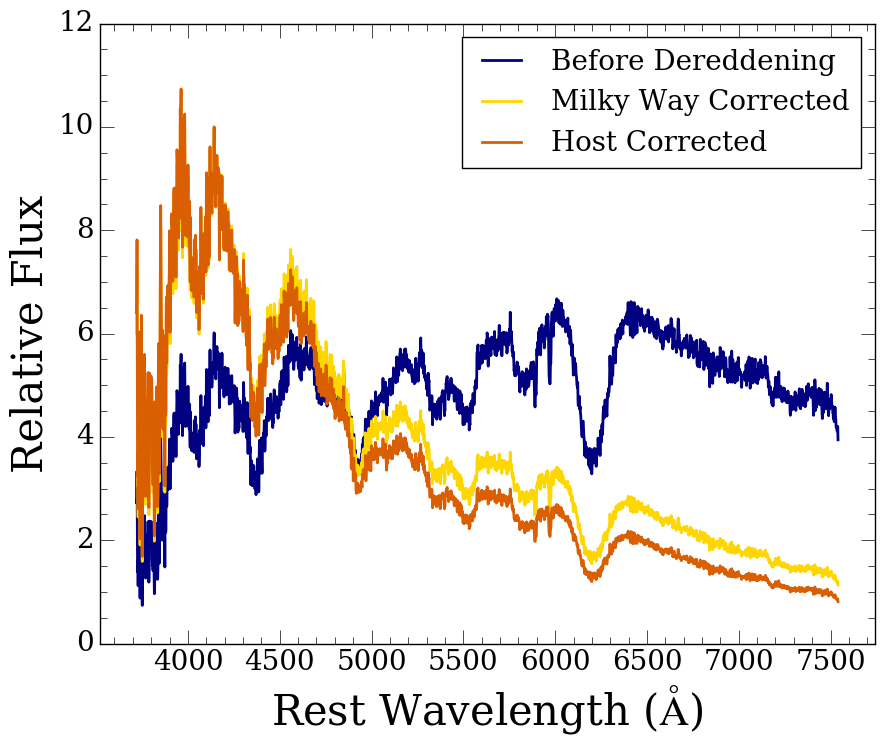

1.48076486441
1.11863666157


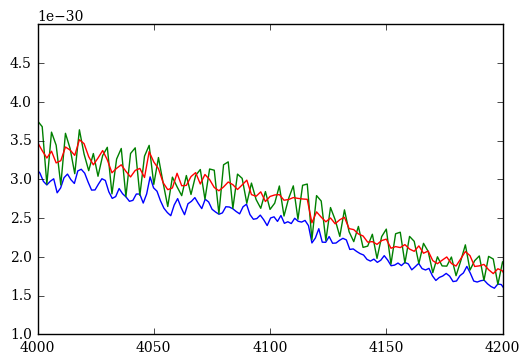

1.48076486441


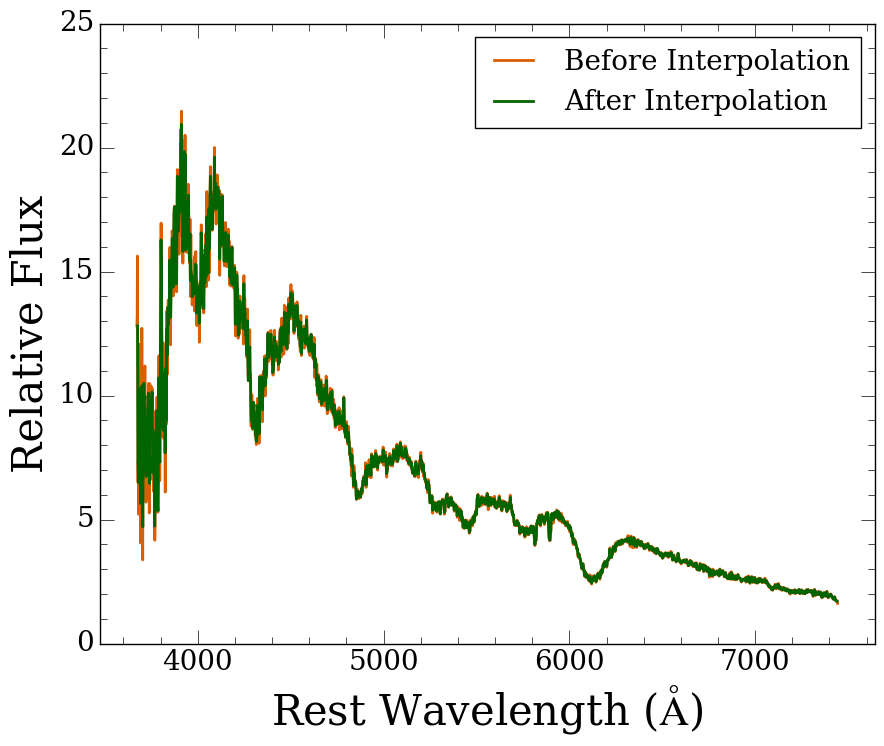

In [8]:
# test_file = cfa_names[1855] #2005lz
test_file = '../../../cfa_test_data\sn2001fh-20011107.20-fast.flm'
print test_file
sn_name = test_file.split('\\')[1].split('-')[0][2:]
source = 'cfa'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)

../../../bsnip_test_data\sn1991bg-19911214-noz.flm
1991bg bsnip 0.003392


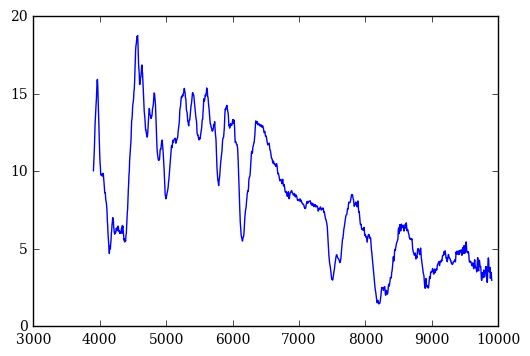

0.00105992923217 78.6729957057


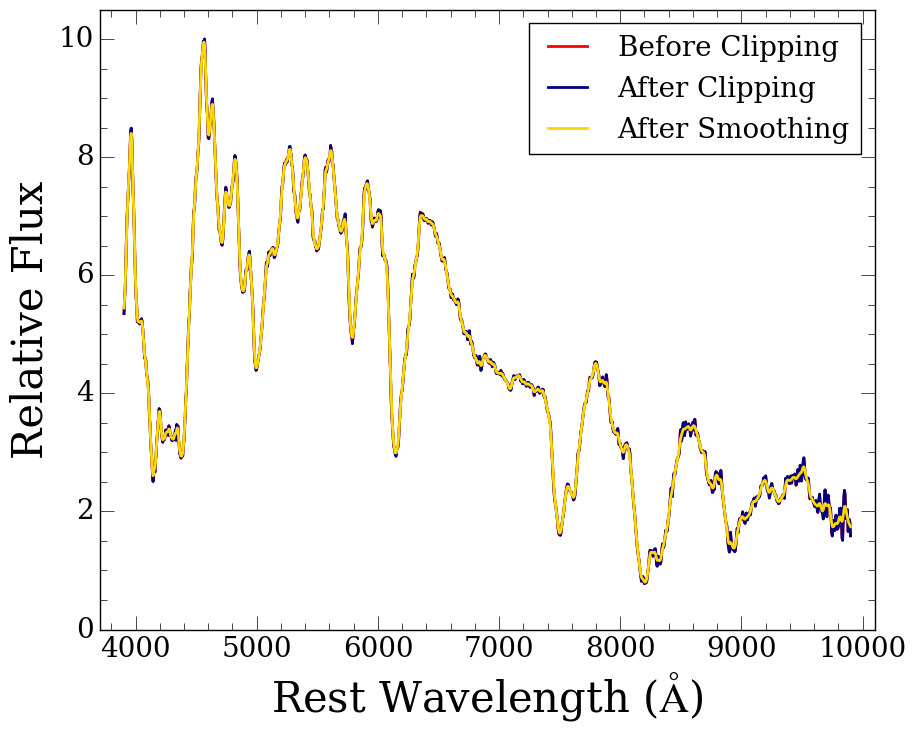

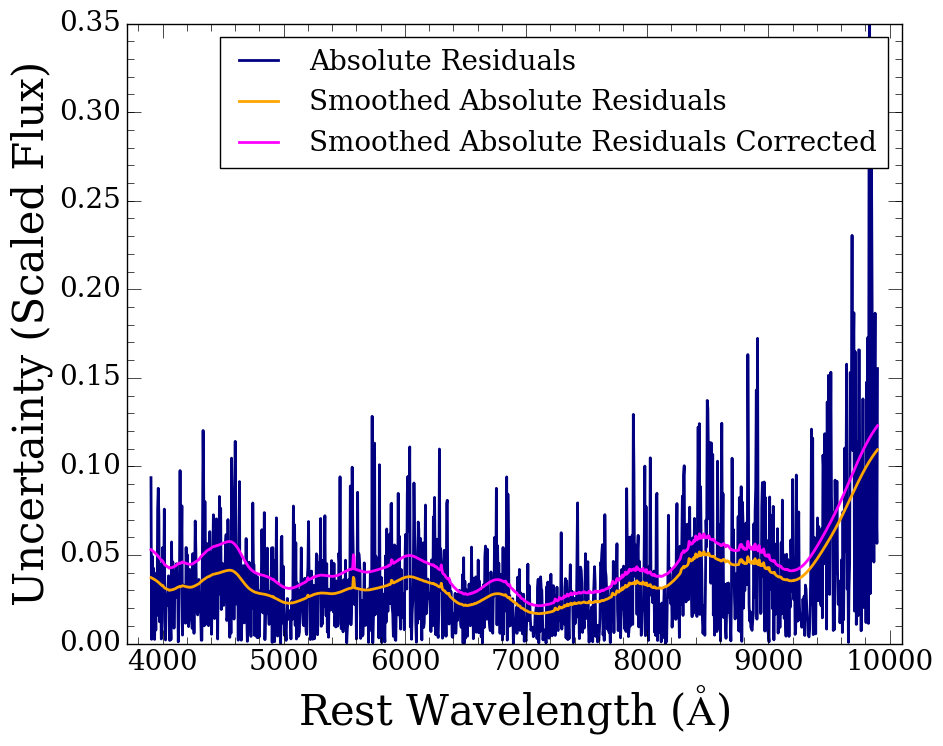

116.643569759
Milky Way correction...


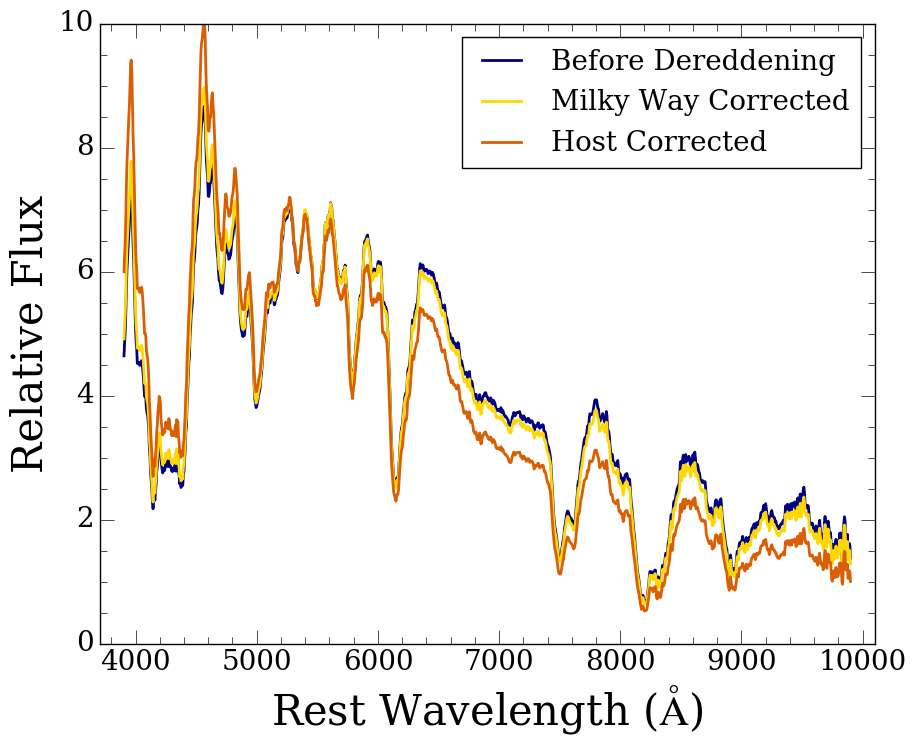

4.98309733384
1.81560283688


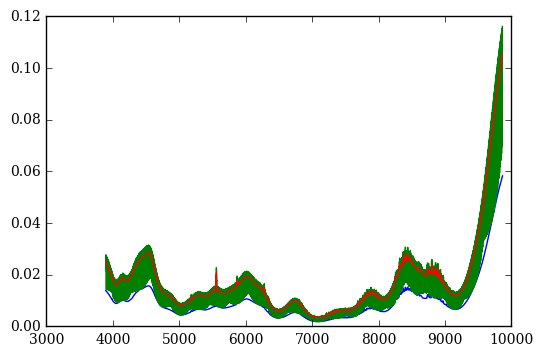

4.98309733384


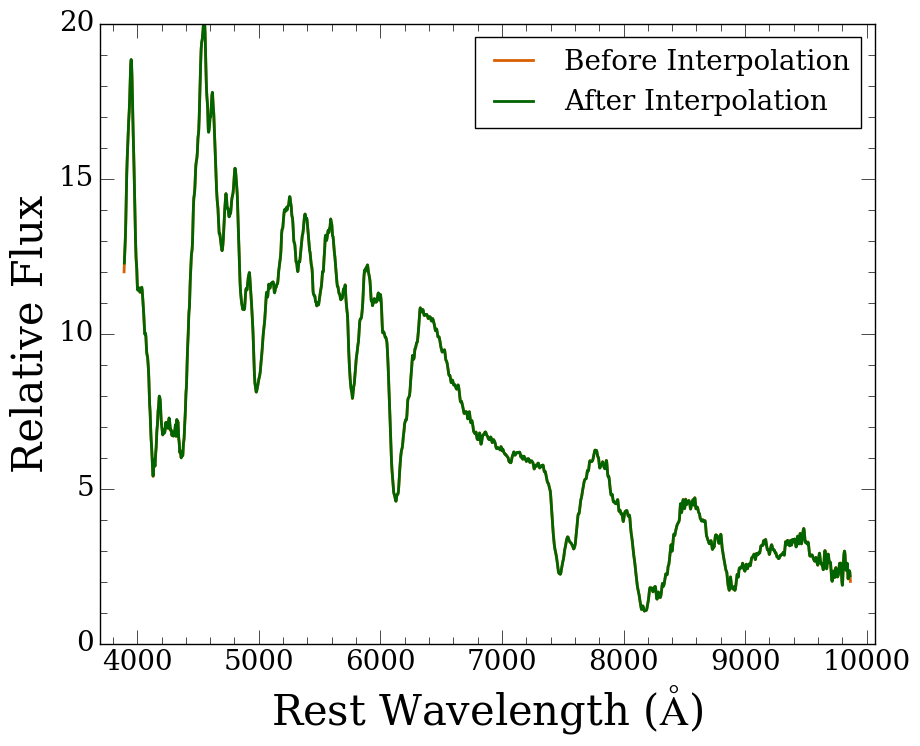

In [27]:
# test_file = bsnip_names[100]
test_file = '../../../bsnip_test_data\sn1991bg-19911214-noz.flm'
print test_file
sn_name = test_file.split('\\')[1].split('-')[0][2:]
source = 'bsnip'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)

../../../csp_test_data\SN06D_060308_b01_DUP_WF.dat
2006d csp 0.0086


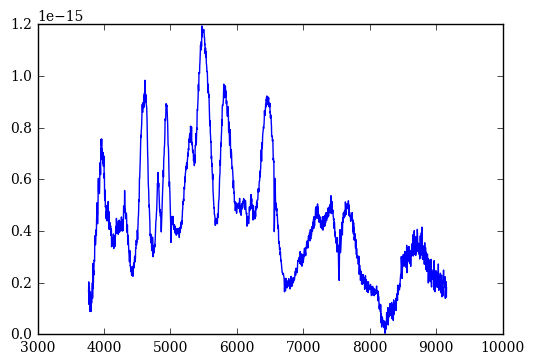

0.00325057864286 30.1657587304


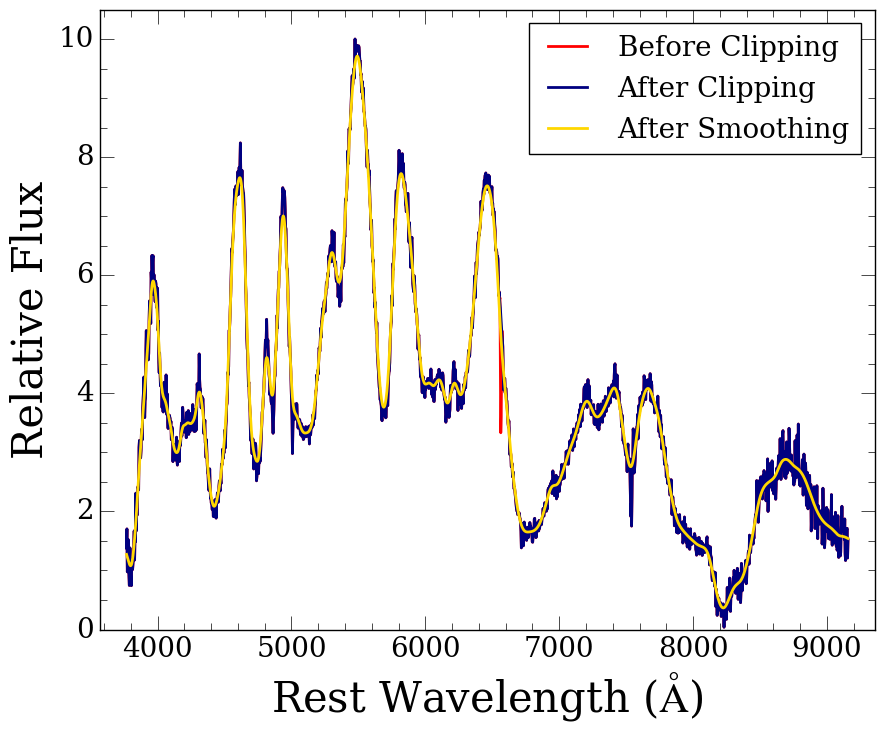

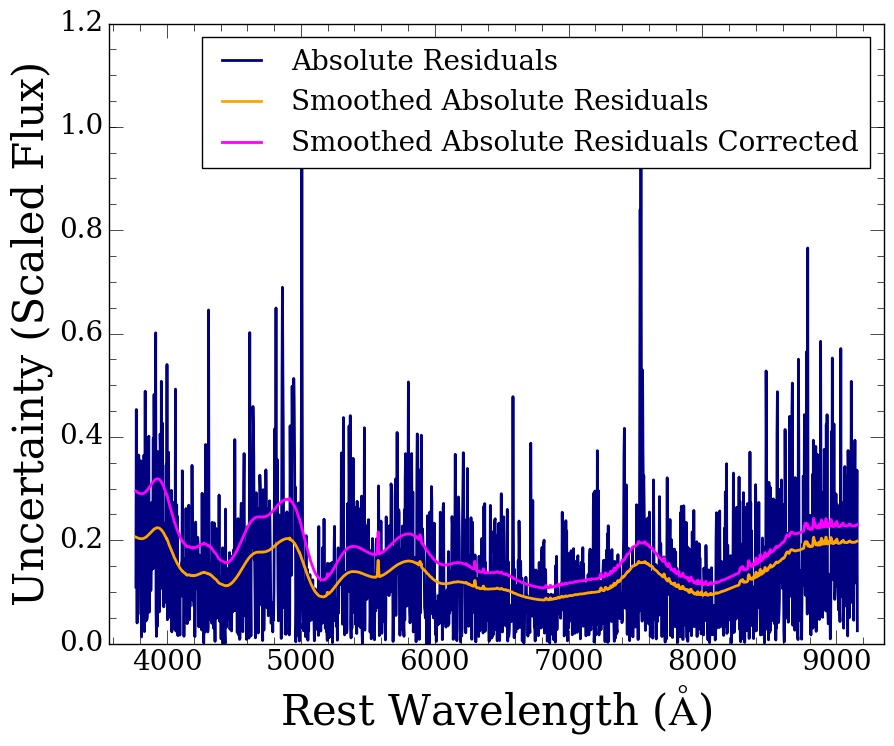

19.4213946732
Milky Way correction...


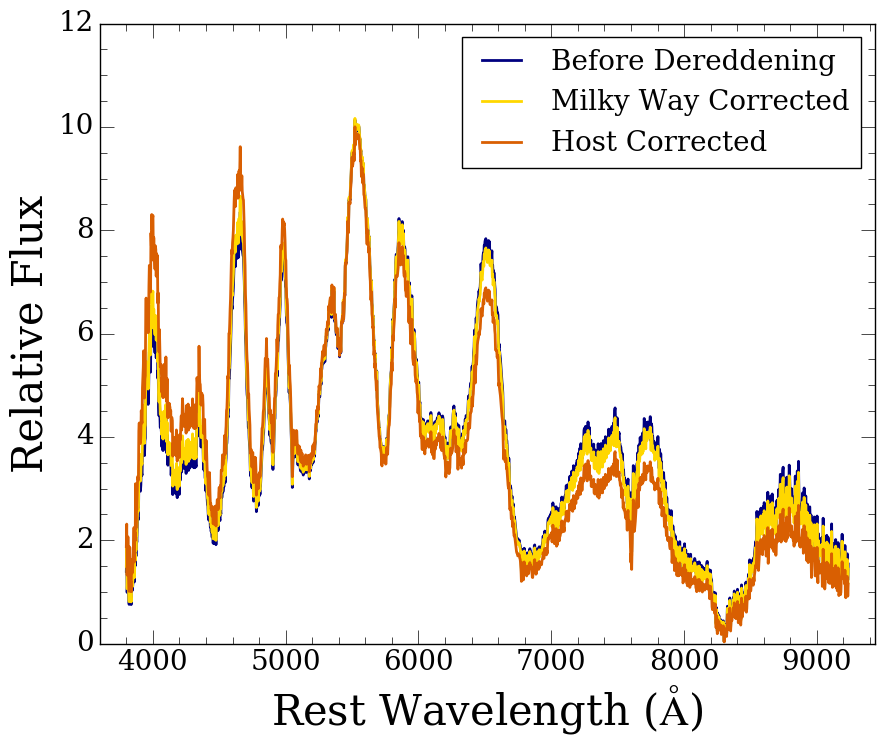

3.0157
1.66206784613


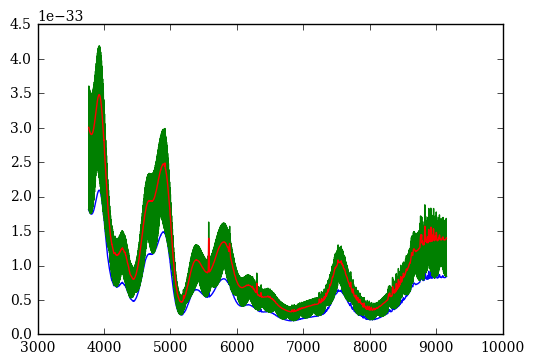

3.0157


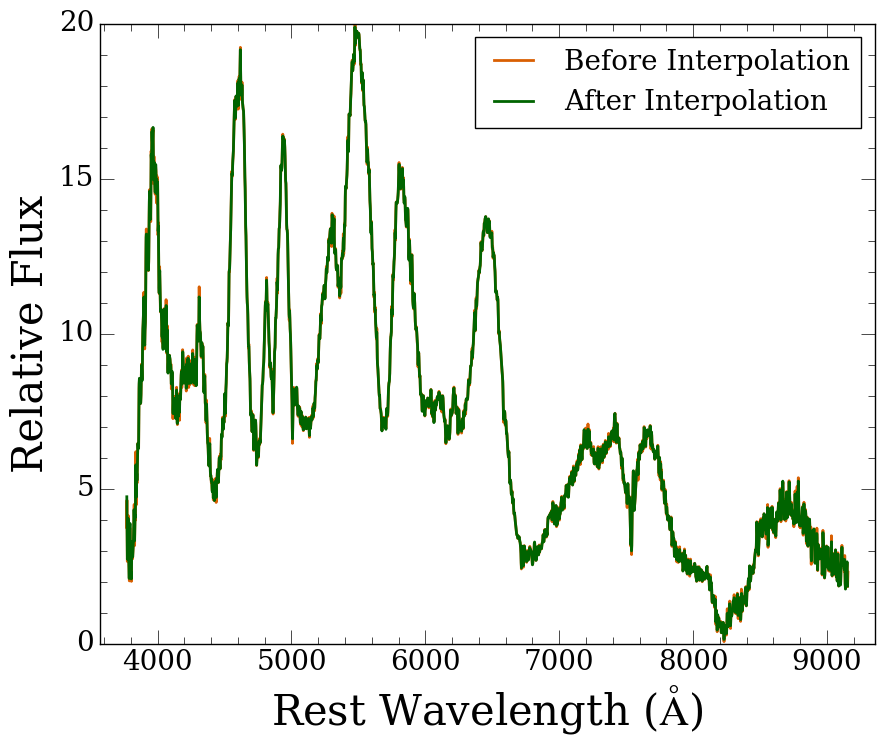

In [28]:
test_file = csp_names[10]
print test_file
sn_name = test_file.split('\\')[1].split('-')[0][2:]
sn_name = test_file.split('\\')[1].split('-')[0][2:]
sn_name = '20' + test_file.split('\\')[1].split('_')[0][2:].lower()
source = 'csp'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)

../../../other_test_data/1994D_19940317_2999_10549_00.dat
1994D
1994D other 0.002058


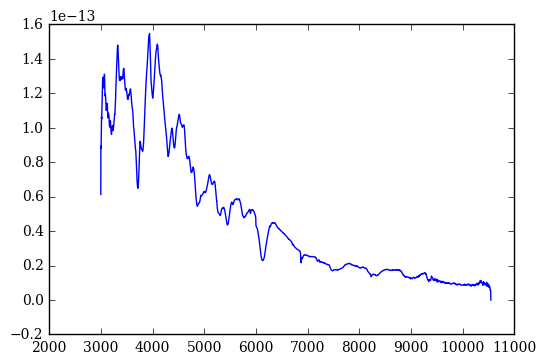

0.001 177.595159529


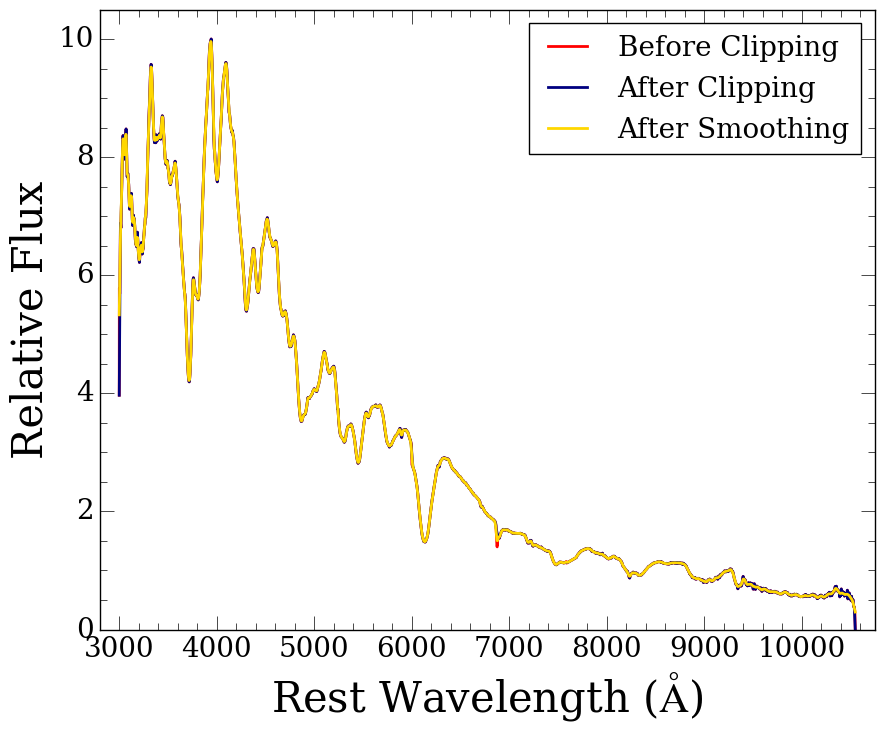

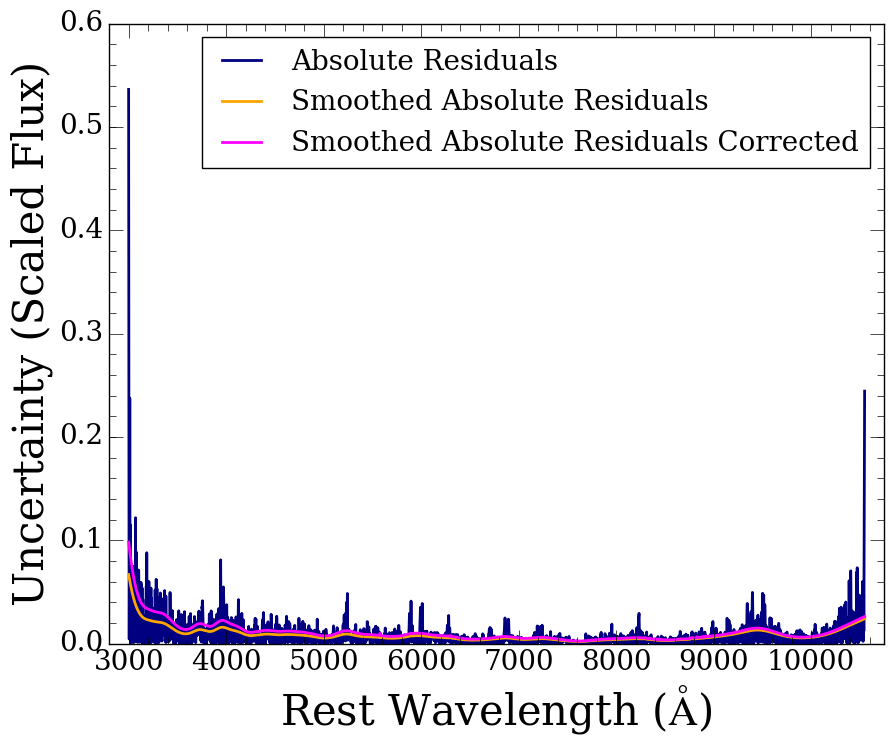

309.178367646
Milky Way correction...


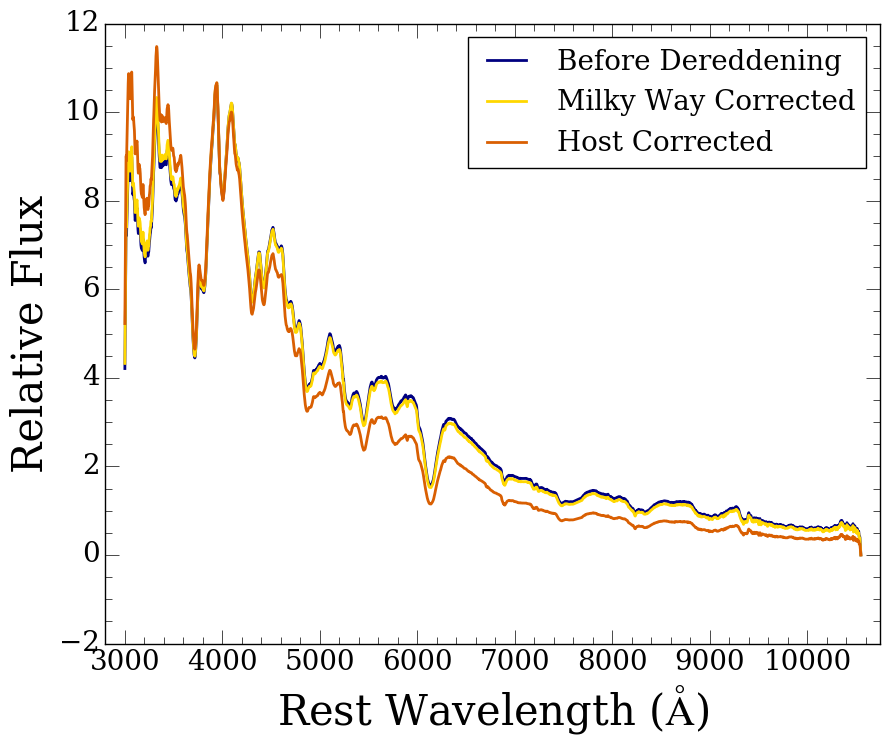

0.997946226666
0.928461329223


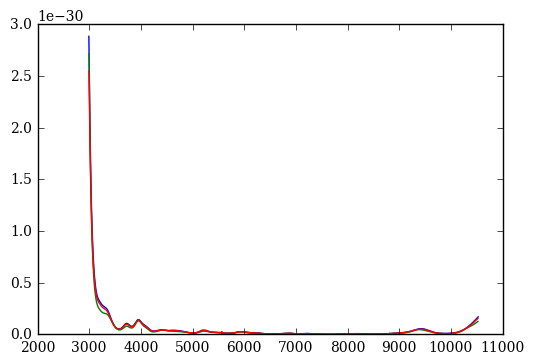

0.997946226666


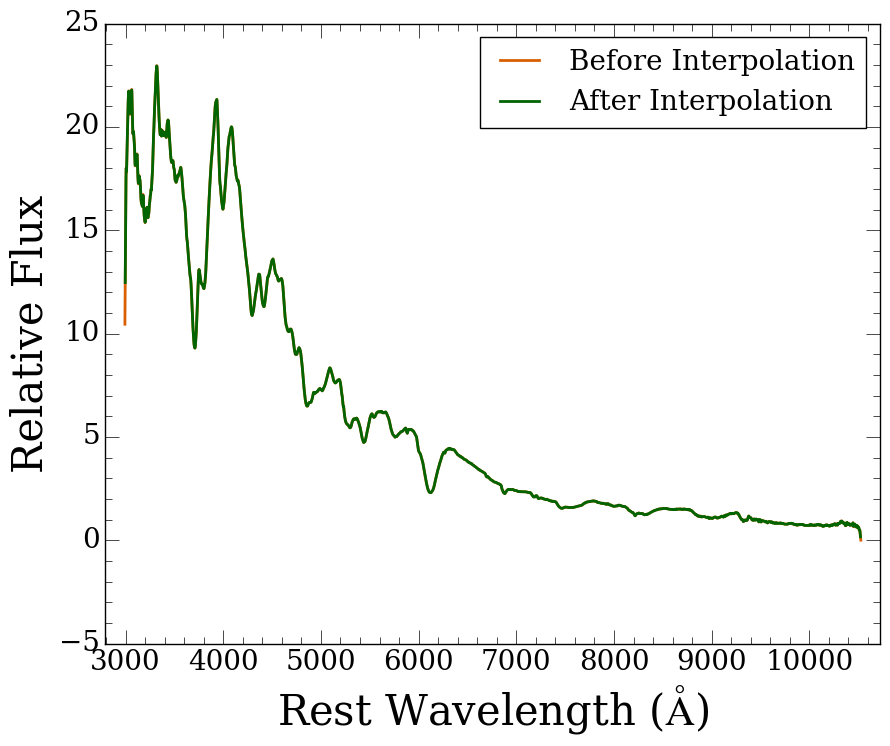

In [39]:
test_file = other_names[10]
test_file = '../../../other_test_data/1994D_19940317_2999_10549_00.dat'
print test_file
sn_name = test_file.split('/')[4].split('_')[0]
print sn_name
source = 'other'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)

../../../swift_uvspec\sn2009an-20090312.24-fixedbg-swift.flm
2009an swift_uv 0.009233


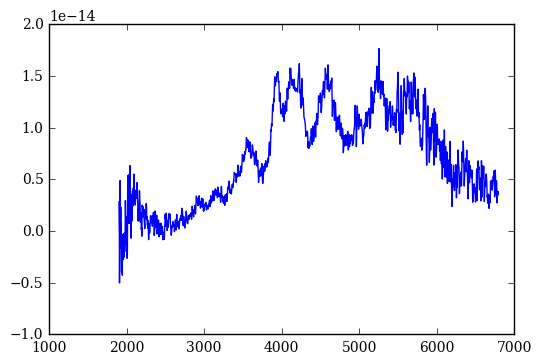

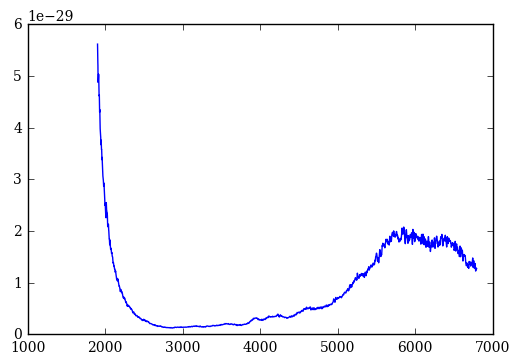

0.00448391999357 2.85605737952


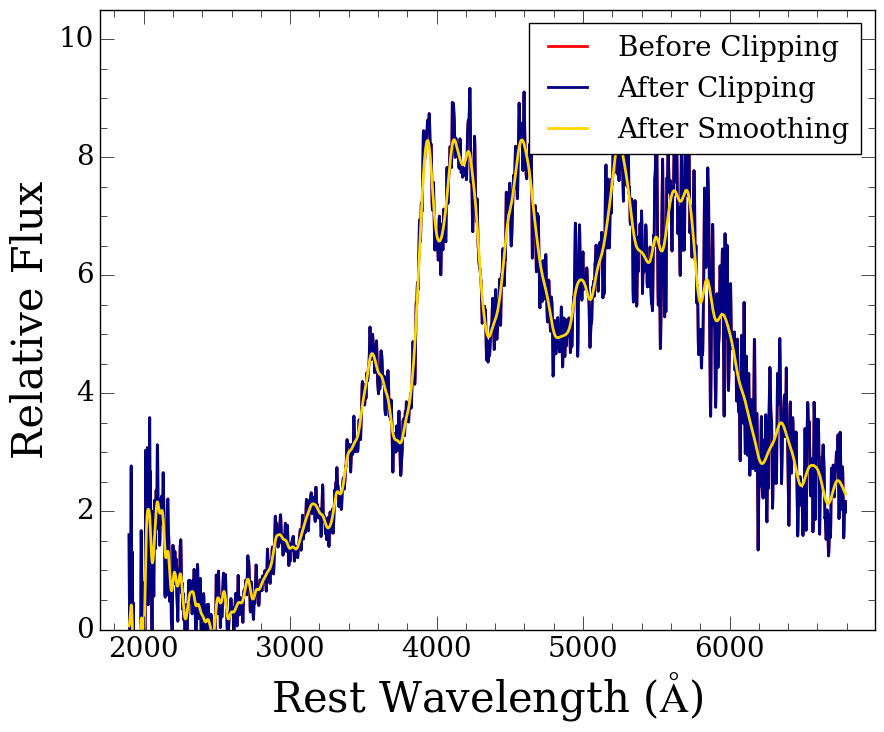

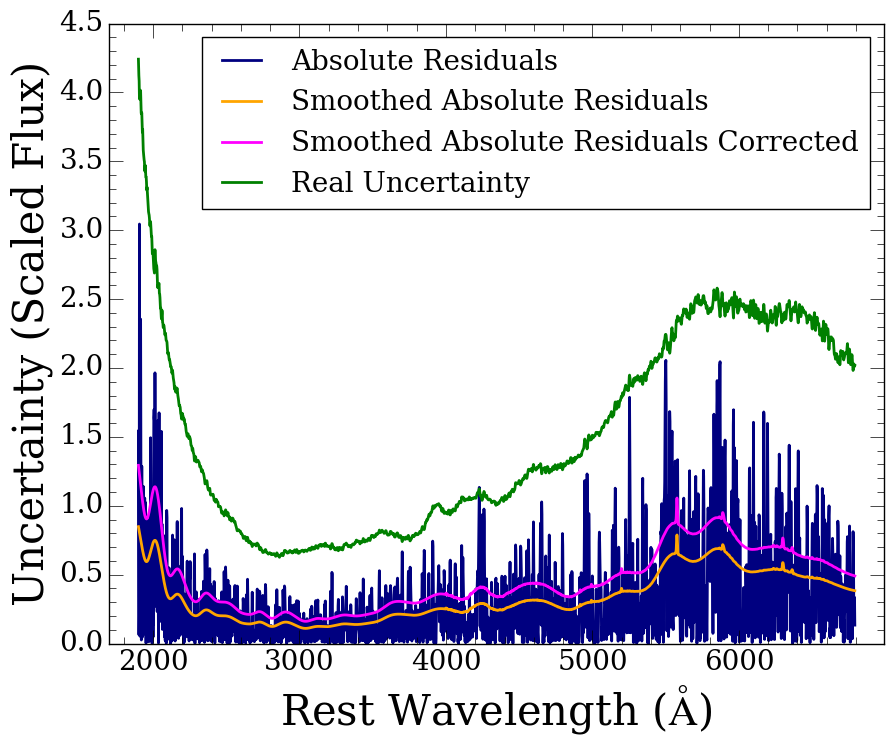

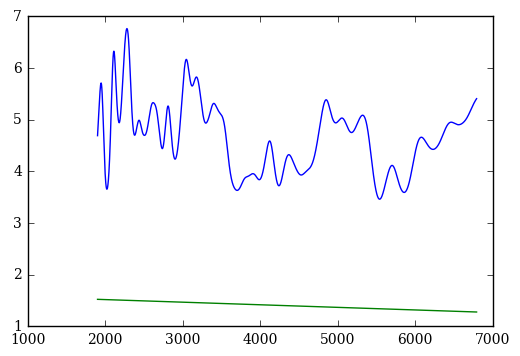

8.98925127594
Milky Way correction...


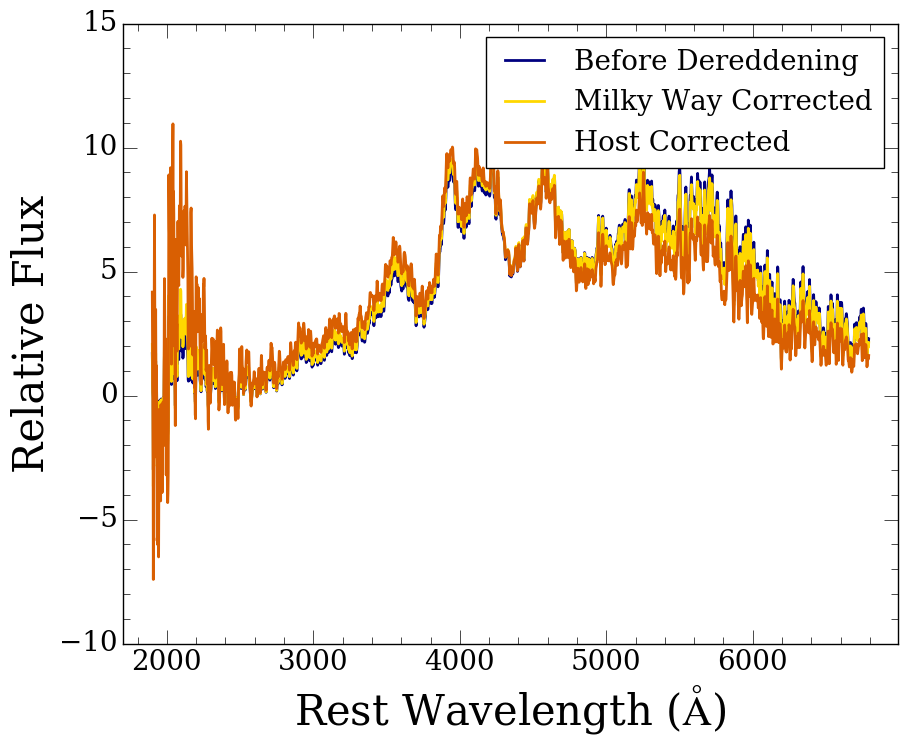

0.990851468392
0.846420896016


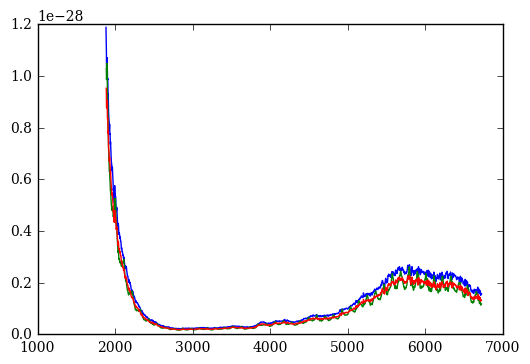

0.990851468392


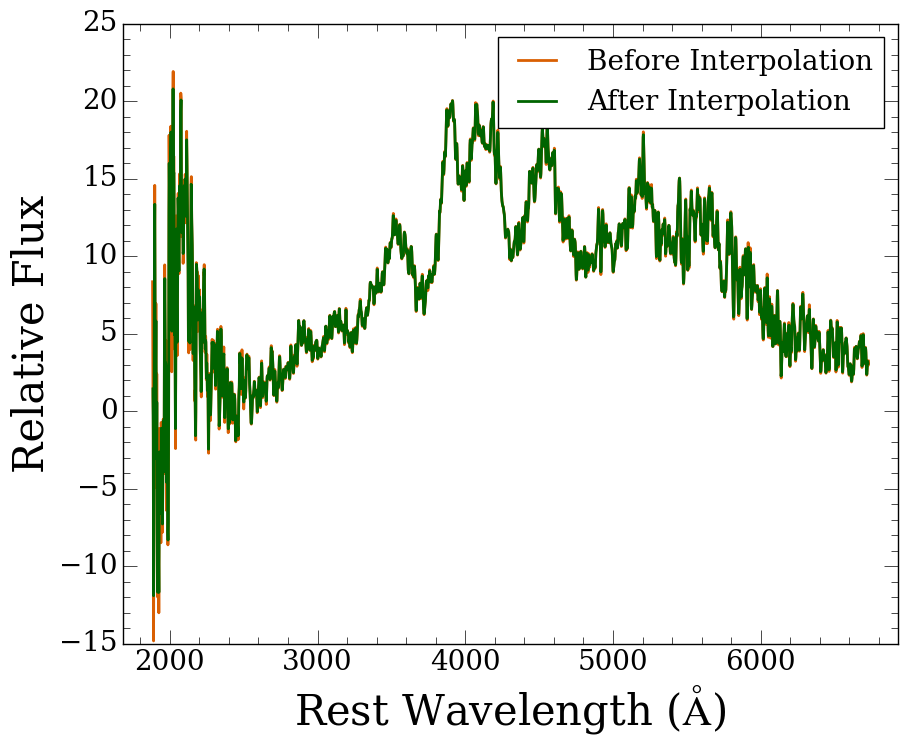

In [30]:
test_file = swift_names[10]
# test_file = '../../../cfa_test_data\sn2001V-20010325.40-mmt.flm'
print test_file
sn_name = test_file.split('\\')[1].split('-')[0][2:]
source = 'swift_uv'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)

../../../ryan_hst\sn2011fe-visit7-hst.flm
2011fe foley_hst 0.000804


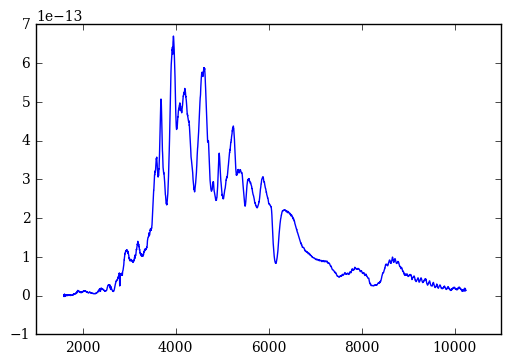

0.001 85.0655594512


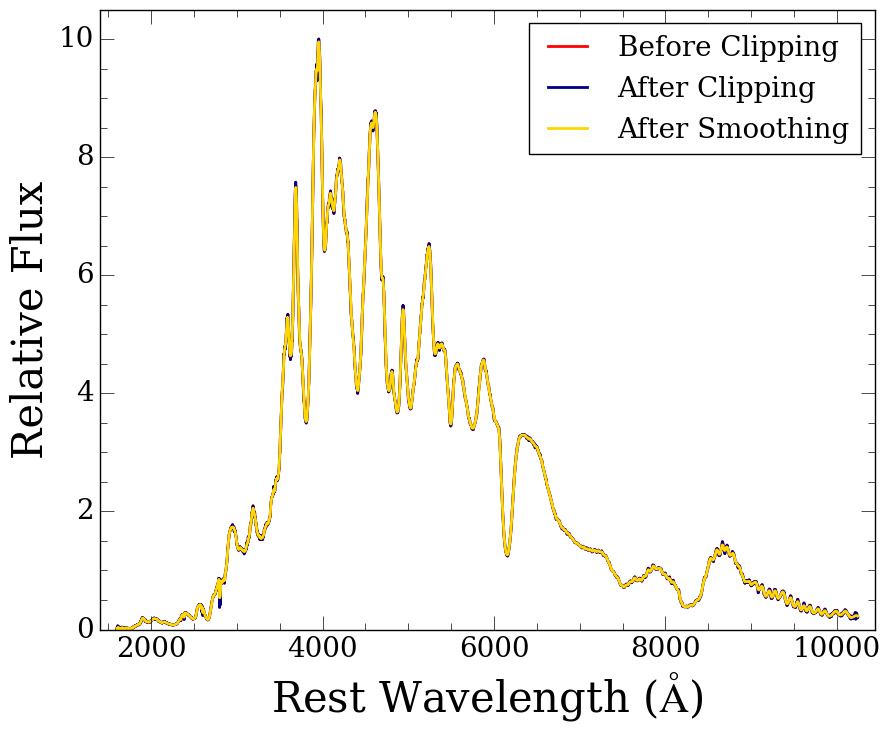

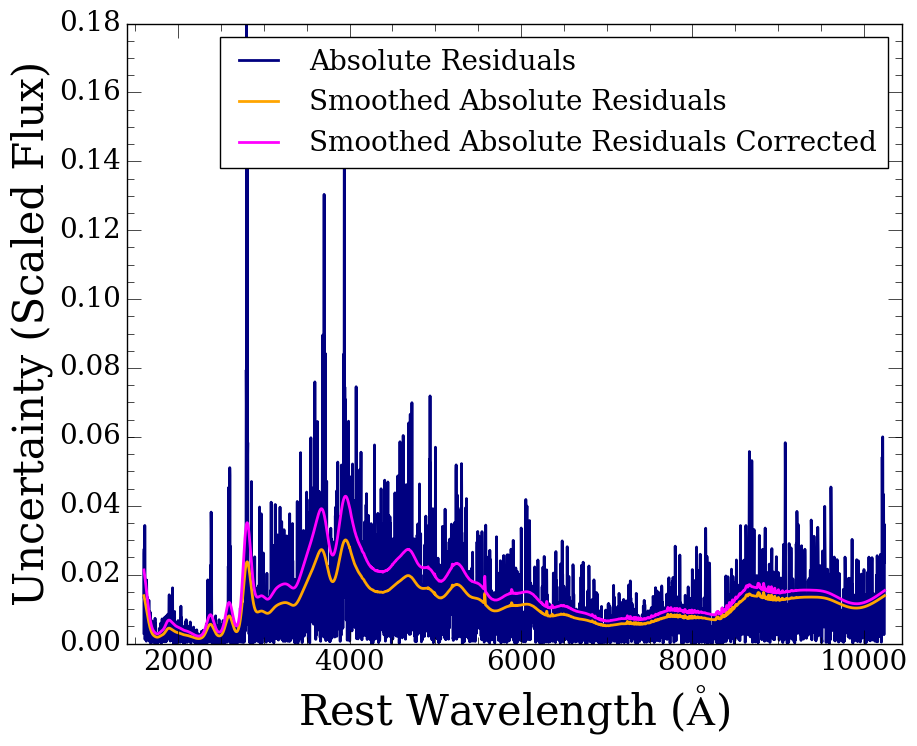

107.603606066


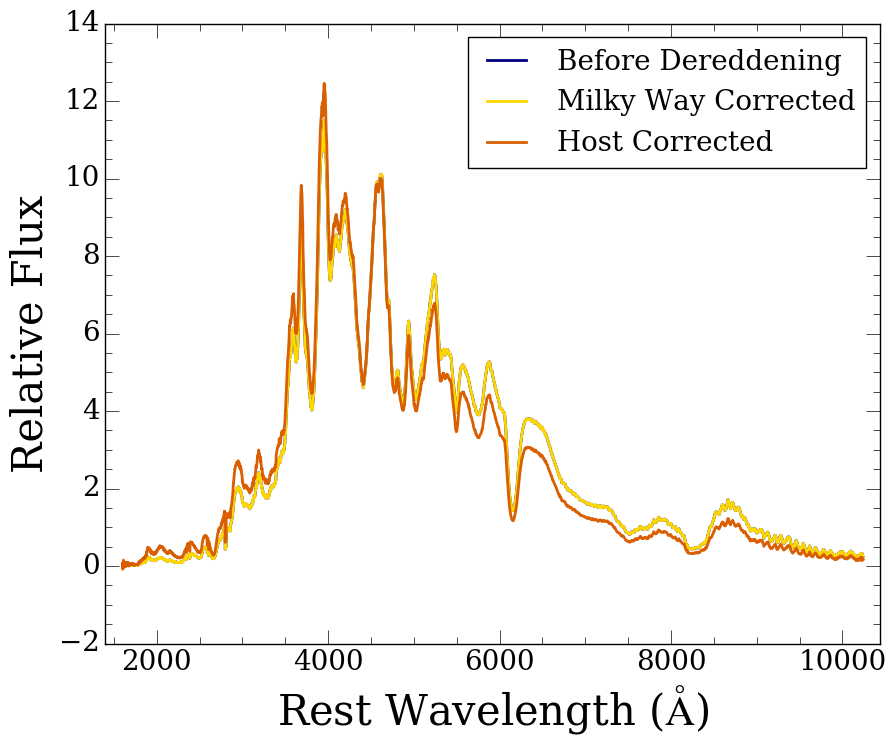

1.49879496884
1.12638873611


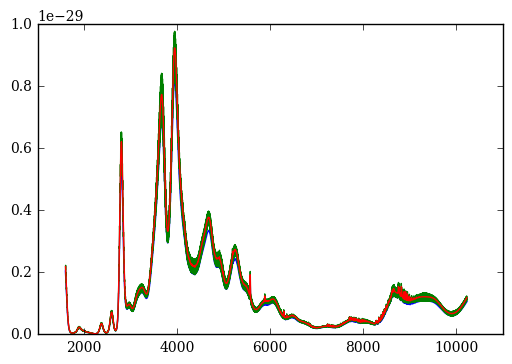

1.49879496884


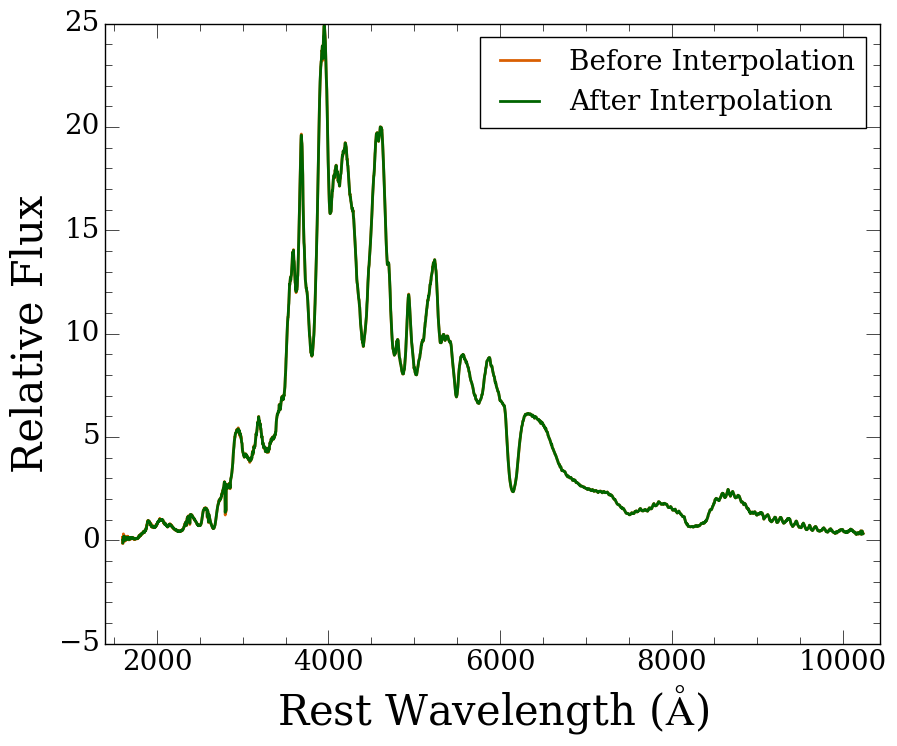

107.603606066


In [31]:
test_file = foley_names[10]
# test_file = '../../../cfa_test_data\sn2001V-20010325.40-mmt.flm'
print test_file
sn_name = test_file.split('\\')[1].split('-')[0][2:]
source = 'foley_hst'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)
print sig_noise